# Vehicle関数

In [3]:
%matplotlib nbagg
import math

import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.transform import Rotation as Rot
import os

import matplotlib.patches as patches

In [18]:
#  Simulation parameter
Q_sim = np.diag([0.2]) ** 2
R_sim = np.diag([1.0, np.deg2rad(30.0)]) ** 2

#DT = 0.1  # time tick [s]
DT = 1  # time tick [s]
SIM_TIME = 50.0  # simulation time [s]

# Particle filter parameter
NP = 30  # Number of Particle

show_animation = True

In [19]:
def calc_input():
    v = 1.0  # [m/s]
    #yaw_rate = 0  # [rad/s]
    yaw_rate = 0.1  # [rad/s]
    u = np.array([[v, yaw_rate]]).T
    return u

In [20]:
def observation(x_true, xd, u, count):
    x_true = motion_model(x_true, u)
    if(count == 0):
        print("　motion_model")

    # add noise to input
    ud1 = u[0, 0] + np.random.randn() * R_sim[0, 0] ** 0.5
    ud2 = u[1, 0] + np.random.randn() * R_sim[1, 1] ** 0.5
    ud = np.array([[ud1, ud2]]).T

    xd = motion_model(xd, ud)
    if(count == 0):
        print("　motion_model")

    return x_true, xd, ud

In [21]:
def motion_model(x, u):
#     F = np.array([[1.0, 0, 0, 0],
#                   [0, 1.0, 0, 0],
#                   [0, 0, 1.0, 0],
#                   [0, 0, 0, 0]])
    F = np.array([[1.0, 0, 0, 0],
                  [0, 0, 0, 0],
                  [0, 0, 1.0, 0],
                  [0, 0, 0, 0]])

#     B = np.array([[DT * math.cos(x[2, 0]), 0],
#                   [DT * math.sin(x[2, 0]), 0],
#                   [0.0, DT],
#                   [1.0, 0.0]])

    B = np.array([[1, 0],
                  [1, 0],
                  [0.0, 0],
                  [1.0, 0.0]])

    x = F.dot(x) + B.dot(u)

    return x

In [24]:
def main():
    #print(__file__ + " start!!")
    print(" start!!")

    time = 0.0
    count = 0

    # State Vector [x y yaw v]'
    x_est = np.zeros((4, 1))
    x_true = np.zeros((4, 1))

    px = np.zeros((4, NP))  # Particle store
    x_dr = np.zeros((4, 1))  # Dead reckoning

    # history
    h_x_est = x_est
    h_x_true = x_true
    h_x_dr = x_true
    
    #directory
    path ="./figures"
    if not os.path.exists(path):
        os.mkdir(path)
    
    #for plot rectangle
    fig, ax = plt.subplots()

    while SIM_TIME >= time:
        time += DT
        if(count == 0):
            print("calc_input")
        u = calc_input()

        if(count == 0):
            print("observation")
        x_true, x_dr, ud = observation(x_true, x_dr, u, count)


        # store data history
        h_x_dr = np.hstack((h_x_dr, x_dr))
        h_x_true = np.hstack((h_x_true, x_true))

        if show_animation:
            plt.cla()
#             if(count>0):
#                 plt.close()
            # for stopping simulation with the esc key.
            plt.gcf().canvas.mpl_connect(
                'key_release_event',
                lambda event: [exit(0) if event.key == 'escape' else None])

            plt.plot(px[0, :], px[1, :], ".r")
            plt.plot(np.array(h_x_true[0, :]).flatten(),
                     np.array(h_x_true[1, :]).flatten(), "-b")
            plt.plot(np.array(h_x_dr[0, :]).flatten(),
                     np.array(h_x_dr[1, :]).flatten(), "-k")
            r = patches.Rectangle(xy=(x_dr[0, :]-1.5, 
                                      x_dr[1, :]-1.5), 
                                      width=5, height=3, ec='#000000', fill=False)
            ax.add_patch(r)
            plt.axis("equal")
            plt.grid(True)
            plt.pause(0.001)
            
            count = count + 1

 start!!


<IPython.core.display.Javascript object>


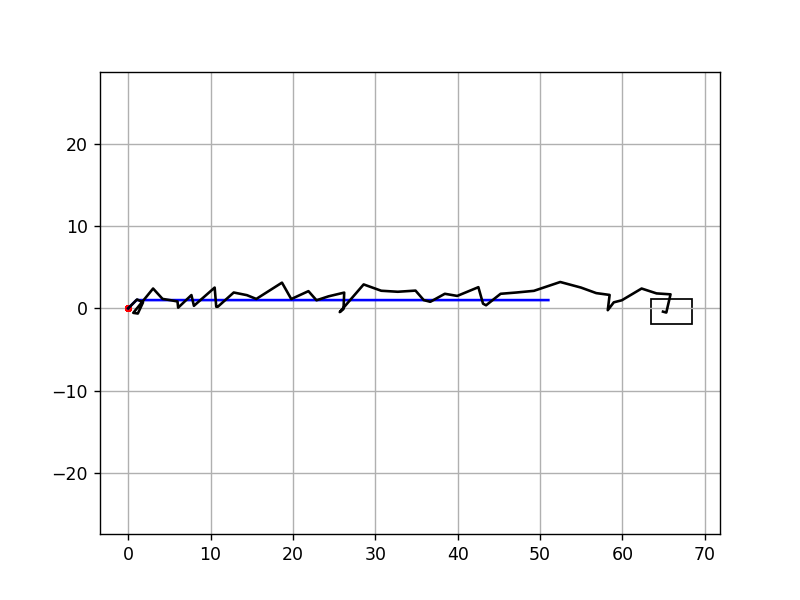

calc_input
observation
　motion_model
　motion_model


In [25]:
if __name__ == '__main__':
    main()

In [17]:
rf_id = np.array([[10.0, 0.0],
                  [10.0, 10.0],
                  [0.0, 15.0],
                  [-5.0, 20.0]])

rf_id.shape

(4, 2)